### Putting into practice what was studied in the topic of EDA

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE


In [158]:
dataframe = pd.read_csv('../../data/housing_price_dataset.csv')
dataframe = dataframe.loc[~(dataframe['Price'] < 0)]
dataframe.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


### First impressions of dataset

In [159]:
dataframe.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49978.000000,49978.000000,49978.000000,49978.000000,49978.000000
mean,2006.752551,3.498659,1.995458,1985.404338,224931.667960
std,575.350298,1.116325,0.815859,20.718407,75995.682992
min,1000.000000,2.000000,1.000000,1950.000000,154.779120
25%,1514.000000,3.000000,1.000000,1967.000000,170007.487130
50%,2008.000000,3.000000,2.000000,1985.000000,225100.123857
75%,2506.000000,4.000000,3.000000,2003.000000,279395.826288
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


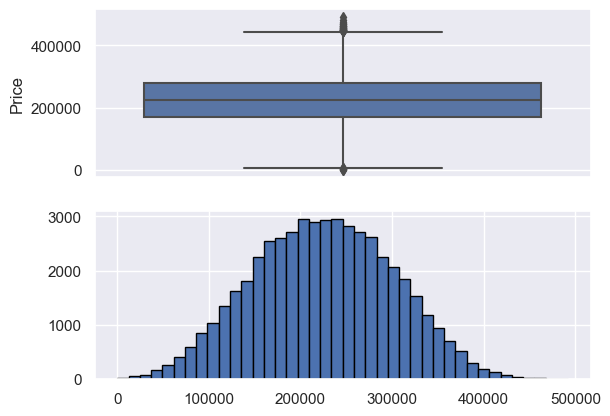

In [160]:
fig, axes = plt.subplots(2)
axes = axes.flatten()

ax = sns.boxplot(y='Price', data=dataframe, orient='v', ax=axes[0])
ax = plt.hist(dataframe['Price'], bins=40, edgecolor='black')
plt.show()

In [161]:
dataframe['Price'].skew()

0.0010093774488721967

In [162]:
dataframe['Price'].kurt()

-0.4289993635186309

### Result first impressions
There are outliers.
Almost perfect distribution.
It exhibits a slightly platykurtic kurtosis.

### Enhancing the exploration
- Exclude missing data.
- Enhance the charts/graphs.
- Separate houses by class (Construction era, location, and square meters).
- Detect more outliers.

In [163]:
dataframe.dropna(inplace=True)

C:\Users\siera\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


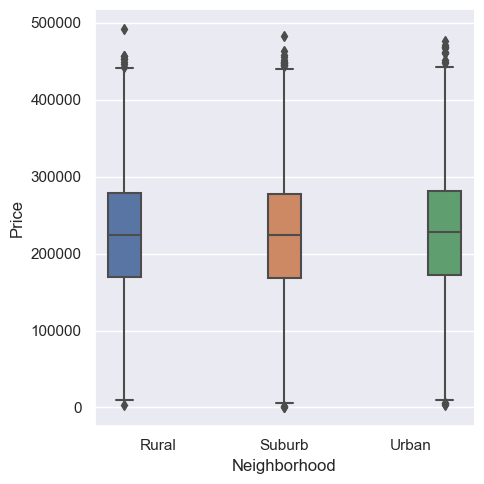

In [164]:
sns.catplot(x='Neighborhood', y='Price', data=dataframe, kind='box', hue='Neighborhood')

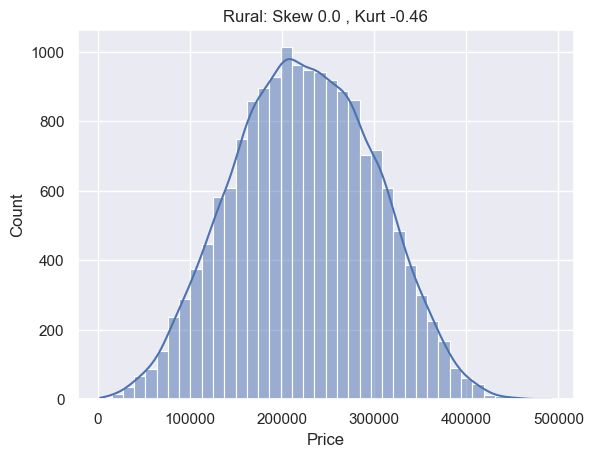

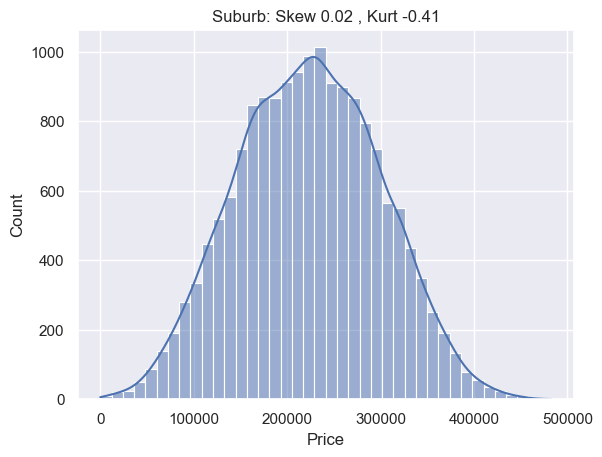

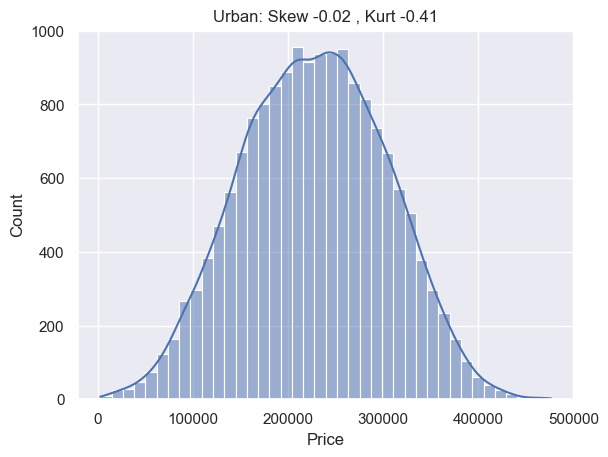

In [165]:
for column in dataframe.Neighborhood.unique():
    df_filter = dataframe[dataframe.Neighborhood == column]
    sns.histplot(data=df_filter, x='Price', bins=40, kde=True)
    plt.title(f'{column}: Skew {round(df_filter.Price.skew(), 2)} , Kurt {round(df_filter.Price.kurt(), 2)}')
    plt.show()

#### Relação da localidade das casas com o preço
Como vemos as 3 areas tem uma assimetria quase zero 
Um curtoise com uma aparencia platocúrtica bem baixa

### Proxima comparação Preço com o ano de construção

In [166]:
df_mean = dataframe.groupby('YearBuilt')['Price'].apply('mean').reset_index()
df_mean

,YearBuilt,Price
0,1950,221824.023360
1,1951,226840.452189
2,1952,222463.433297
3,1953,224485.564259
4,1954,220447.598725
...,...,...
67,2017,218834.416354
68,2018,223858.330309
69,2019,224064.205270
70,2020,222859.430611


<Axes: xlabel='YearBuilt', ylabel='Price'>

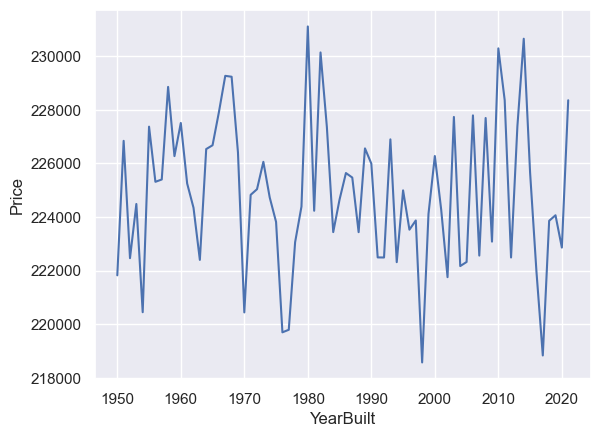

In [167]:
sns.set_theme(style="darkgrid")
sns.lineplot(y='Price', x='YearBuilt', data=df_mean)

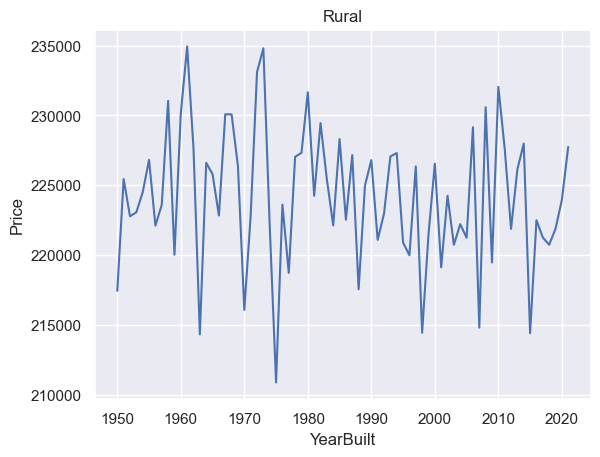

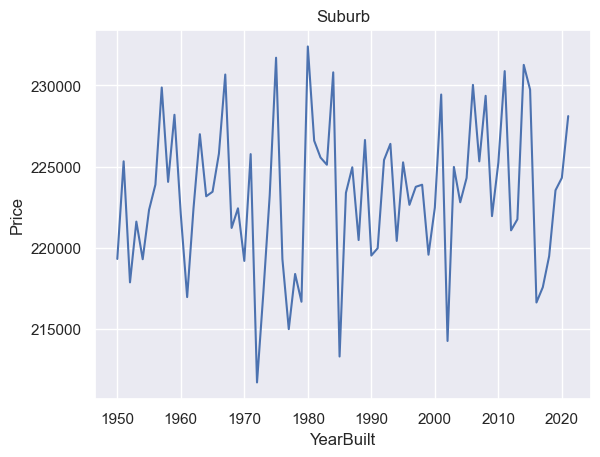

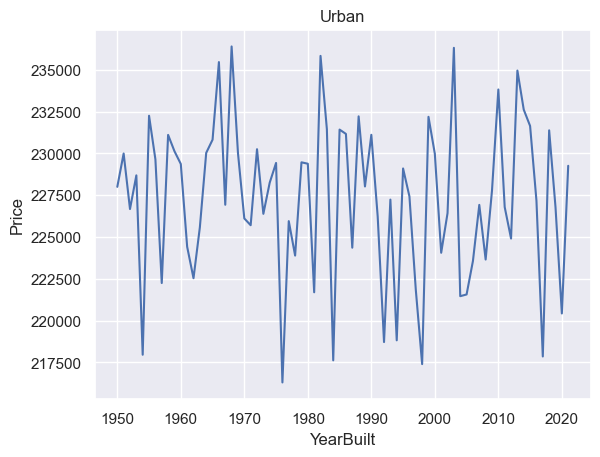

In [168]:
df_mean = dataframe.groupby(['YearBuilt', 'Neighborhood'])['Price'].apply('mean').reset_index()
for nei in df_mean.Neighborhood.unique():
    sns.lineplot(y='Price', x='YearBuilt', data=df_mean[df_mean.Neighborhood == nei])
    plt.title(f'{nei}')
    plt.show()

Podemos ver que o ano de construção nao tem tanta influencia quanto achava que poderia ter

### Proximo passo ver o preço do metro por area e a media de area em cada tipo de locar

In [169]:
dataframe.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [170]:
dataframe['PricePerSquareFeet'] = round(dataframe['Price'] / dataframe['SquareFeet'], 2)

In [171]:
dataframe.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,PricePerSquareFeet
0,2126,4,1,Rural,1969,215355.283618,101.30
1,2459,3,2,Rural,1980,195014.221626,79.31
2,1860,2,1,Suburb,1970,306891.012076,165.00
3,2294,2,1,Urban,1996,206786.787153,90.14
4,2130,5,2,Suburb,2001,272436.239065,127.90


In [172]:
df_mean = dataframe.groupby('YearBuilt')['PricePerSquareFeet'].apply('mean').reset_index()

C:\Users\siera\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


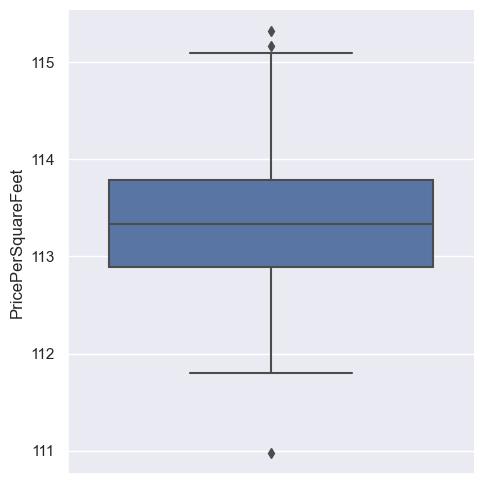

In [173]:
sns.catplot(data=df_mean, y='PricePerSquareFeet', kind='box')

Text(0.5, 1.0, 'PricePerSquareFeet : Skew 0.0 , Kurt 0.04, STD 0.88')

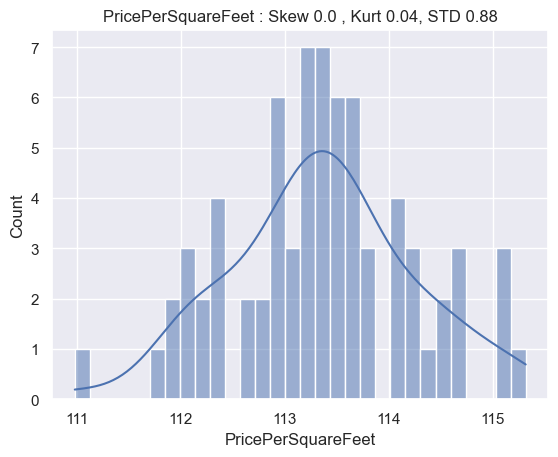

In [174]:
sns.histplot(data=df_mean, x='PricePerSquareFeet', bins=30, kde=True)
plt.title(
    f'PricePerSquareFeet : Skew {round(df_mean.PricePerSquareFeet.skew(), 2)} , Kurt {round(df_mean.PricePerSquareFeet.kurt(), 2)}, STD {round(df_mean.PricePerSquareFeet.std(), 2)}')

Text(0.5, 1.0, 'Mean Price Per Square Feet')

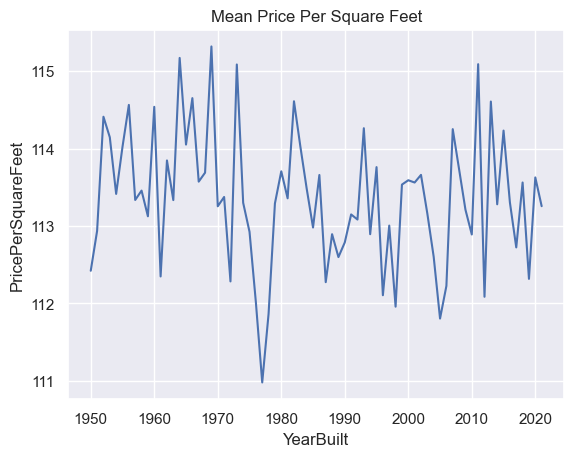

In [175]:
sns.set_theme(style="darkgrid")
sns.lineplot(y='PricePerSquareFeet', x='YearBuilt', data=df_mean)
plt.title(f'Mean Price Per Square Feet')

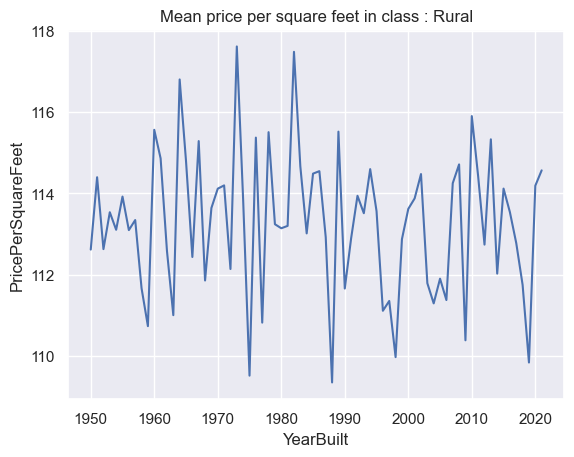

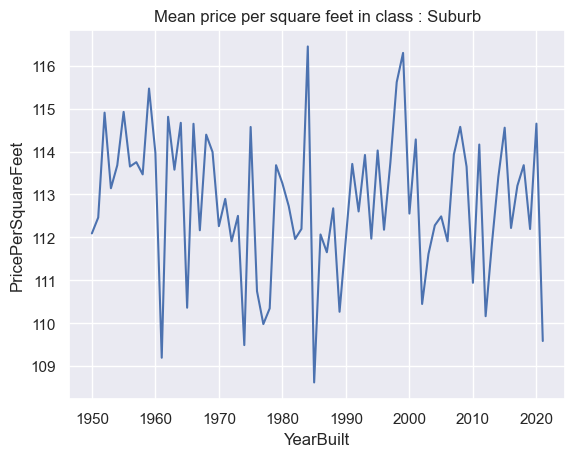

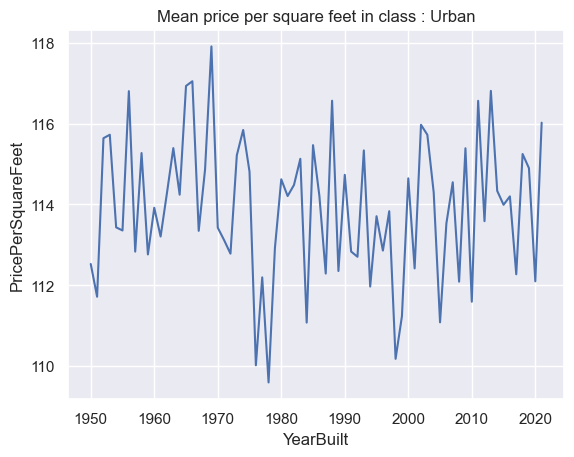

In [176]:
df_mean = dataframe.groupby(['YearBuilt', 'Neighborhood'])['PricePerSquareFeet'].apply('mean').reset_index()
for nei in df_mean.Neighborhood.unique():
    sns.lineplot(y='PricePerSquareFeet', x='YearBuilt', data=df_mean[df_mean.Neighborhood == nei])
    plt.title(f'Mean price per square feet in class : {nei}')
    plt.show()

### Média por numero de comodos, banheiro e quartos

In [177]:
dataframe.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,PricePerSquareFeet
0,2126,4,1,Rural,1969,215355.283618,101.30
1,2459,3,2,Rural,1980,195014.221626,79.31
2,1860,2,1,Suburb,1970,306891.012076,165.00
3,2294,2,1,Urban,1996,206786.787153,90.14
4,2130,5,2,Suburb,2001,272436.239065,127.90


In [178]:
df_mean = dataframe.groupby(['Bedrooms', 'Bathrooms'])['PricePerSquareFeet'].mean().reset_index()

In [179]:
print(df_mean)

    Bedrooms  Bathrooms  PricePerSquareFeet
0          2          1          107.619723
1          2          2          109.591177
2          2          3          111.062845
3          3          1          110.550249
4          3          2          111.438280
5          3          3          113.218220
6          4          1          112.778483
7          4          2          115.151724
8          4          3          115.683405
9          5          1          116.025655
10         5          2          118.149086
11         5          3          119.178165


In [180]:
df_mean = dataframe.groupby(['Bedrooms', 'Bathrooms'])['Price'].mean().reset_index()

In [181]:
df_mean = dataframe.groupby(['Bedrooms', 'Bathrooms', 'Neighborhood'])['PricePerSquareFeet'].mean().reset_index()

C:\Users\siera\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


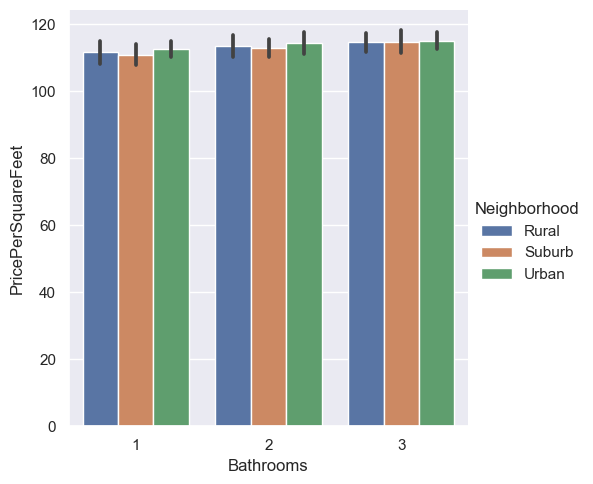

In [182]:
sns.catplot(data=df_mean, y='PricePerSquareFeet', x='Bathrooms', hue='Neighborhood', kind='bar')

C:\Users\siera\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


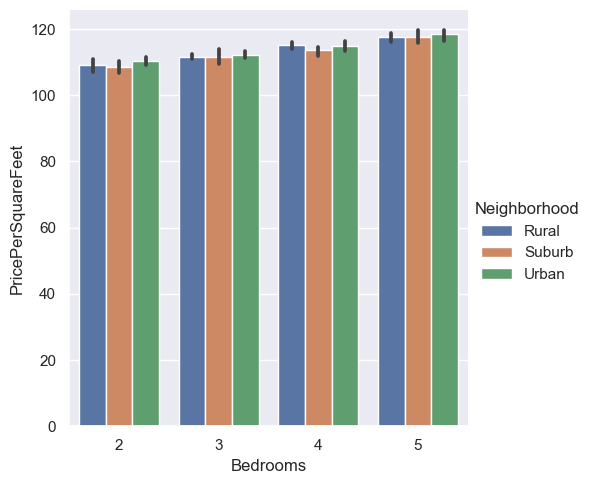

In [183]:
sns.catplot(data=df_mean, y='PricePerSquareFeet', x='Bedrooms', hue='Neighborhood', kind='bar')

Como vemos um comportamento esperado , quanto mais comodos , mais caro é a casa , a diferença de preço por local é bem baixa 

#### Correlação 

In [184]:
label_encoder = LabelEncoder()
dataframe['Neighborhood'] = label_encoder.fit_transform(dataframe['Neighborhood'])

<Axes: >

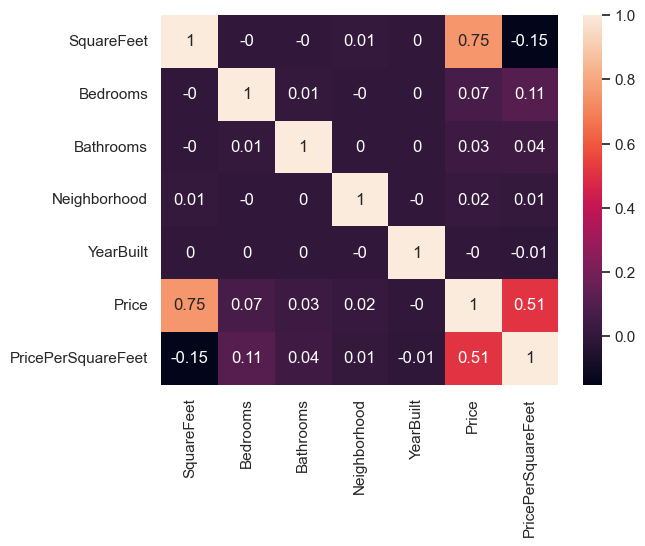

In [185]:
sns.heatmap(round(dataframe.corr(), 2), annot=True)

<Axes: >

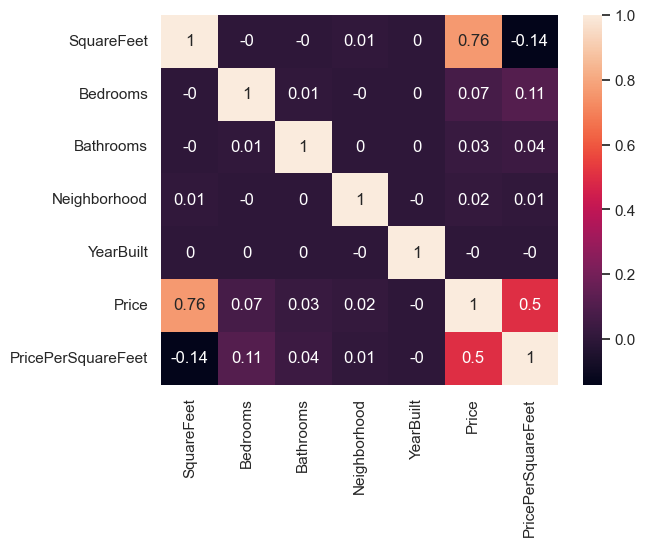

In [186]:
sns.heatmap(round(dataframe.corr(method='spearman'), 2), annot=True)

<Axes: >

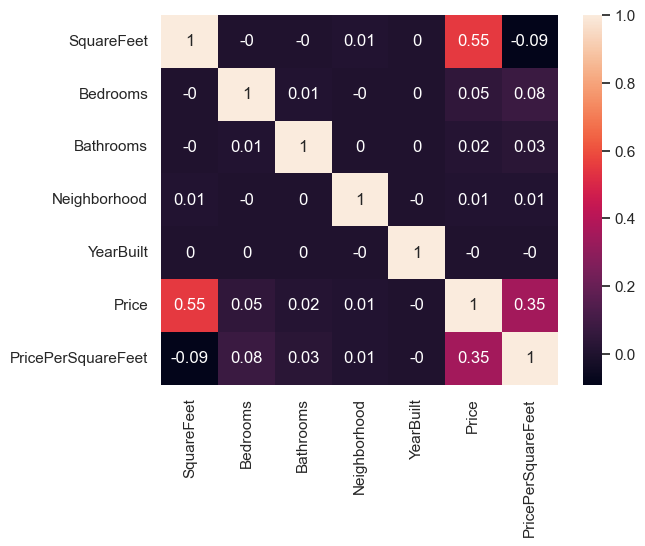

In [187]:
sns.heatmap(round(dataframe.corr(method='kendall'), 2), annot=True)

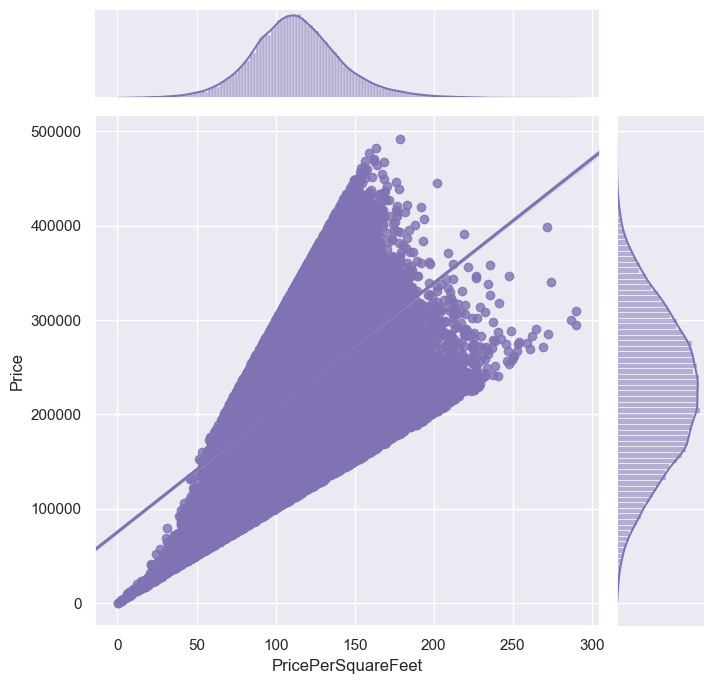

In [188]:
g = sns.jointplot(x="PricePerSquareFeet", y="Price", data=dataframe, kind="reg", truncate=False,
                  color="m", height=7)

Como podemos ver a unica correlação que conseguimos achar em um nivel aceitavel é do preço bruto com o preço médio por metro quadrado

### PCA

In [189]:
dataframe = pd.read_csv('../../data/housing_price_dataset.csv')

In [190]:
y = dataframe['Neighborhood']
X = dataframe.drop(['Neighborhood'], axis=1)
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [191]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

[5.79776692e+09 1.44544360e+05]
[9.99974995e-01 2.49304168e-05]


array([0.999975  , 0.99999993])

<Axes: xlabel='PCA1', ylabel='PCA2'>

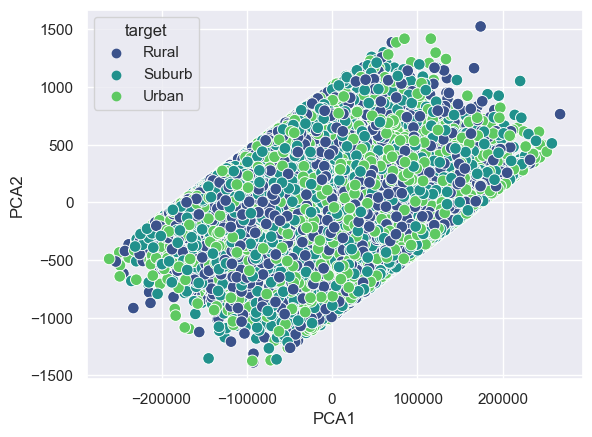

In [192]:
pca_data = pca.transform(X)
pca_data = pd.DataFrame(pca_data)
pca_data['target'] = dataframe['Neighborhood']
coluns_name = {0: 'PCA1', 1: 'PCA2'}
pca_data.rename(columns=coluns_name, inplace=True)
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=pca_data, palette='viridis', s=70)

### T-SNE

In [193]:
tsne = TSNE(n_components=2,n_jobs=-1)
df_transform = tsne.fit_transform(X)
coluns_name = {0: 't_sne_1', 1: 't_sne_2'}
df_transform = pd.DataFrame(df_transform)
df_transform.rename(columns=coluns_name, inplace=True)

In [194]:
df_transform['Neighborhood'] = y

<Axes: xlabel='t_sne_1', ylabel='t_sne_2'>

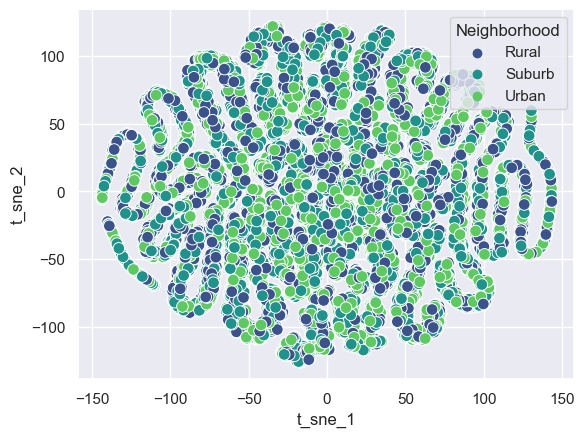

In [195]:
sns.scatterplot(x='t_sne_1', y='t_sne_2',hue='Neighborhood', data=df_transform, palette='viridis', s=70)

### Umap

In [196]:
reducer = umap.UMAP(n_jobs=-1)
data_reduced = reducer.fit_transform(X=X)
coluns_name = {0: 'X', 1: 'Y'}
data_reduced = pd.DataFrame(data_reduced)
data_reduced.rename(columns=coluns_name, inplace=True)
data_reduced['Neighborhood'] = y

<Axes: xlabel='X', ylabel='Y'>

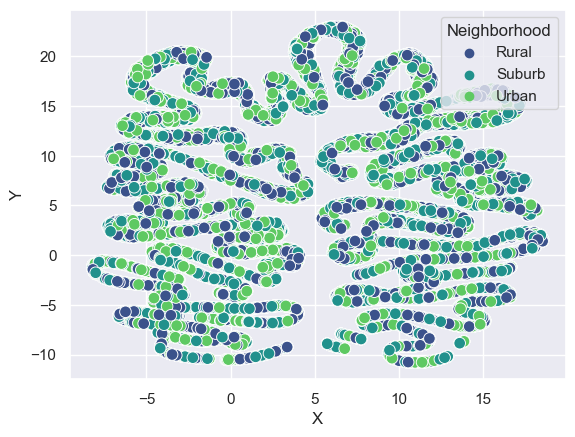

In [197]:
sns.scatterplot(x='X', y='Y', hue='Neighborhood', data=data_reduced, palette='viridis', s=70)

## MDS

In [198]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, random_state=42,normalized_stress='auto')
data_reduced = embedding.fit_transform(X[:1000])
columns_names = {0: 'X', 1: 'Y'}
data_reduced = pd.DataFrame(data_reduced, columns=['X', 'Y'])
data_reduced['Neighborhood'] = y

<Axes: xlabel='X', ylabel='Y'>

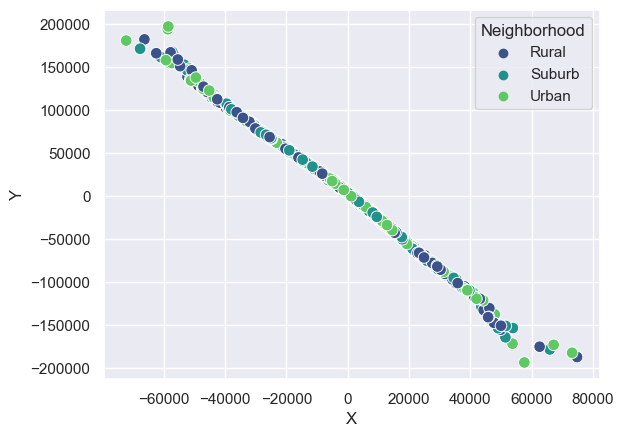

In [199]:
sns.scatterplot(x='X', y='Y', hue='Neighborhood',data=data_reduced, palette='viridis', s=70)

<Axes: xlabel='X', ylabel='Y'>

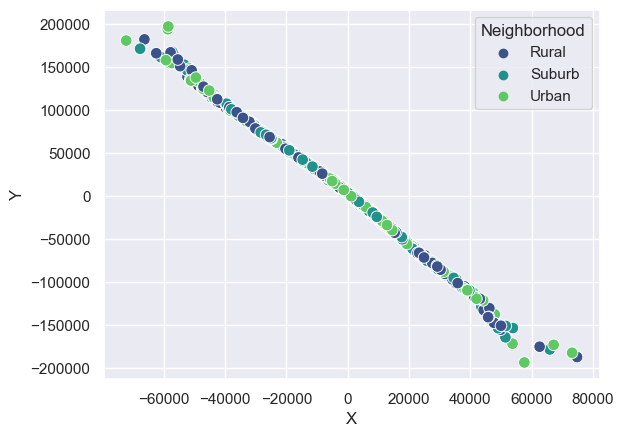

In [201]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='linear',n_jobs=-1)
data_reduced = embedding.fit_transform(X[:1000])
data_reduced = pd.DataFrame(data_reduced)
data_reduced.rename(columns=coluns_name, inplace=True)
data_reduced['Neighborhood'] = y
sns.scatterplot(x='X', y='Y', hue='Neighborhood',data=data_reduced, palette='viridis', s=70)

<Axes: xlabel='X', ylabel='Y'>

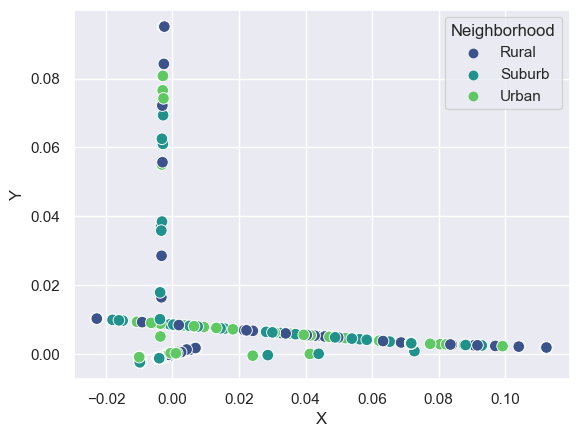

In [202]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2,n_jobs=-1)
data_reduced = embedding.fit_transform(X[:1000])
data_reduced = pd.DataFrame(data_reduced)
data_reduced.rename(columns=coluns_name, inplace=True)
data_reduced['Neighborhood'] = y
sns.scatterplot(x='X', y='Y', hue='Neighborhood',data=data_reduced, palette='viridis', s=70)                                      

C:\Users\siera\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\siera\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\siera\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\siera\anaconda3\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\siera\anaconda3\Li

<Axes: xlabel='X', ylabel='Y'>

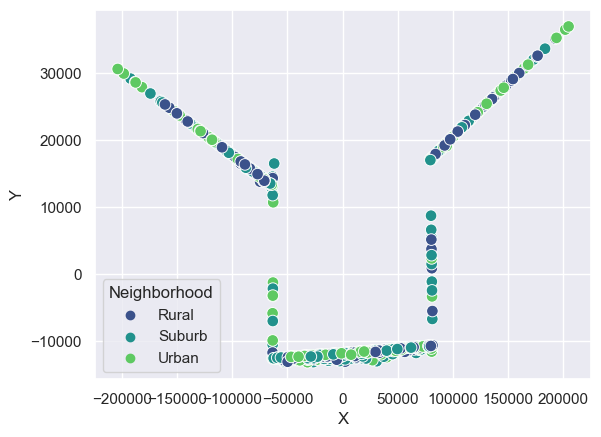

In [203]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2,n_jobs=-1)
data_reduced = embedding.fit_transform(X[:1000])
data_reduced = pd.DataFrame(data_reduced)
data_reduced.rename(columns=coluns_name, inplace=True)
data_reduced['Neighborhood'] = y
sns.scatterplot(x='X', y='Y', hue='Neighborhood',data=data_reduced, palette='viridis', s=70)

<Axes: xlabel='X', ylabel='Y'>

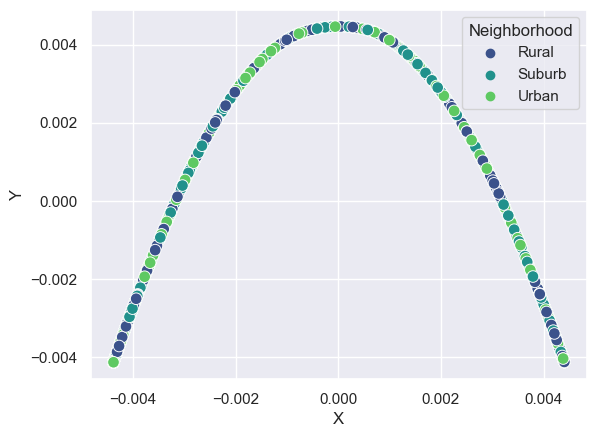

In [204]:
from sklearn.manifold import SpectralEmbedding
embedding = SpectralEmbedding(n_components=2,n_jobs=-1)
data_reduced = embedding.fit_transform(X[:1000])
data_reduced = pd.DataFrame(data_reduced)
data_reduced.rename(columns=coluns_name, inplace=True)
data_reduced['Neighborhood'] = y
sns.scatterplot(x='X', y='Y', hue='Neighborhood',data=data_reduced, palette='viridis', s=70)